In [1]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [2]:
import matplotlib._color_data as mcd
palette = list(mcd.XKCD_COLORS.values())[::10]

In [3]:
topics = np.array([[-1, 1]])

In [4]:
varied_param = 'consumer_external_interest_prob'
varied_param_legend_label = 'Consumer External Interest'
varied_param_x_label = 'Consumer External Interest'

In [5]:
num_influencers = 1
num_agents = 10

interests = [0, 0.5, 1, 5, 10, 50]
varied_param_values = interests

In [6]:
perfect_info_stats, imperfect_info_stats = test(
    topics=topics,
    varied_param=varied_param,
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=None,
    consumer_topic_interest_func=None,
    agent_topic_interest_func=lambda x: inverse_decay(x, 1, 2),
    consumer_attention_bound=20,
    consumer_external_interest_prob=interests,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=40,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    init_topic_produced_method='farthest',
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=True,
    delay_sensitivity=1
)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing influencer 10
Optimizing producer 0
Optimization succeeded (overall 0.01861848599946825s): nit=4, nfev=14, njev=7.
Optimizing producer 1
Optimization succeeded (overall 0.021412059000795125s): nit=4, nfev=18, njev=9.
Optimizing producer 2
Optimization succeeded (overall 0.023631776000911486s): nit=5, nfev=20, njev=10.
Optimizing producer 3
Optimization succeeded (overall 0.02049885399901541s): nit=4, nfev=16, njev=8.
Optimizing producer 4
Optimization succeeded (overall 0.02420760200038785s): nit=5, nfev=18, njev=9.
Optimizing producer 5
Optimization succeeded (overall 0.022885559999849647s): nit=5, nfev=18, njev=9.
Optimizing producer 6
Optimization succeeded (overall 0.018570501000795048s): nit=4, nfev=16, njev=8.
Optimizing producer 7
Optimization succeede

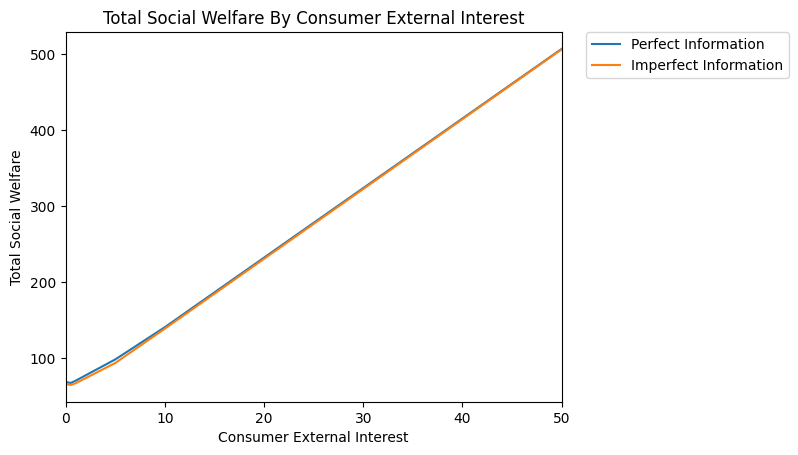

In [7]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'total_social_welfare', varied_param_values, varied_param_x_label, 'Total Social Welfare')

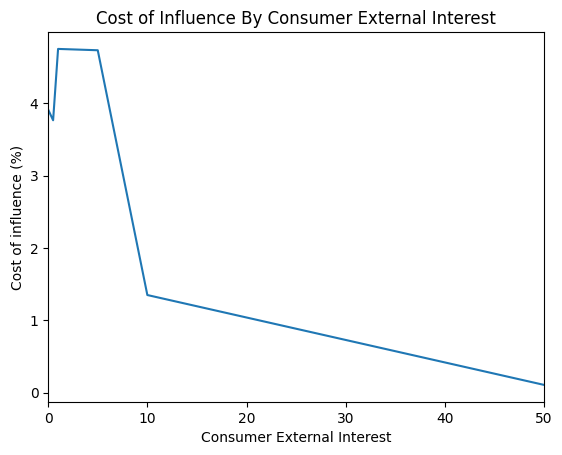

In [8]:
visualize.plot_cost_of_influence_by_test(f"Cost of Influence By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, varied_param_values, varied_param_x_label, 'Cost of Influence')

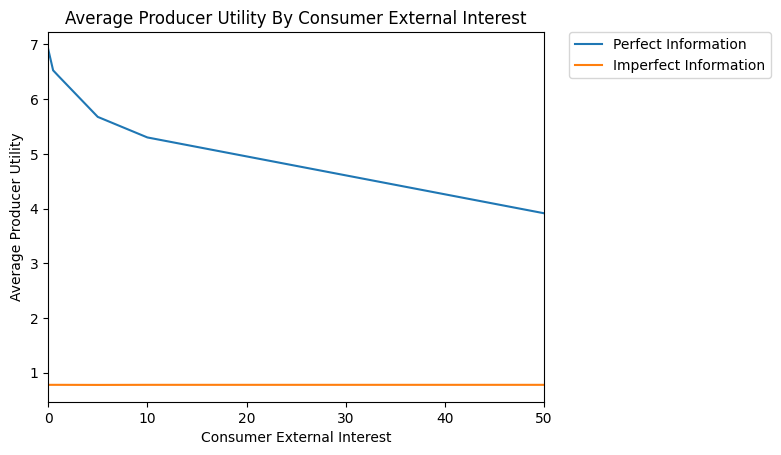

In [9]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_producer_utility', varied_param_values, varied_param_x_label, 'Average Producer Utility')

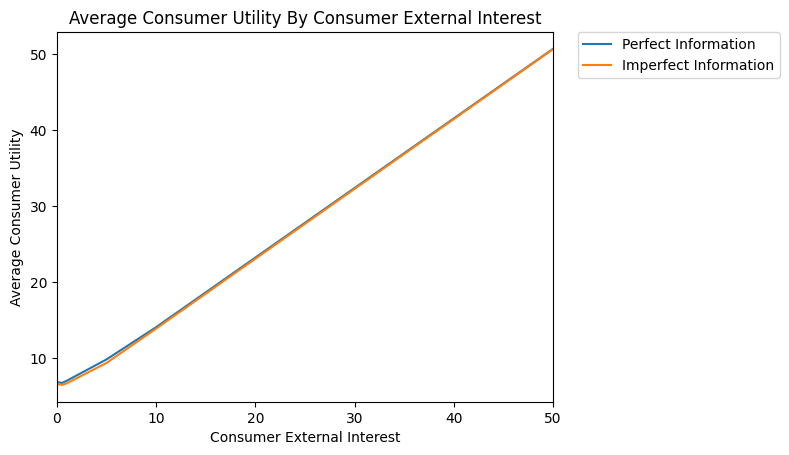

In [10]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_consumer_utility', varied_param_values, varied_param_x_label, 'Average Consumer Utility')

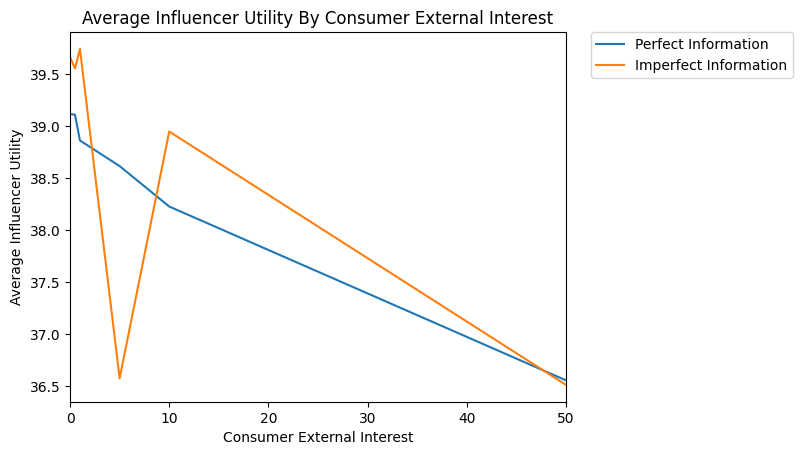

In [11]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_utility', varied_param_values, varied_param_x_label, 'Average Influencer Utility')

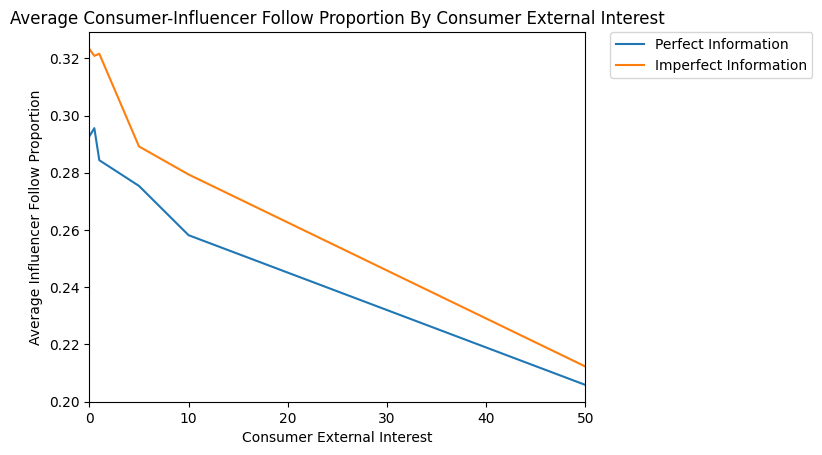

In [12]:
visualize.plot_ending_value_by_test(f"Average Consumer-Influencer Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_follow_proportion', varied_param_values, varied_param_x_label, 'Average Influencer Follow Proportion')

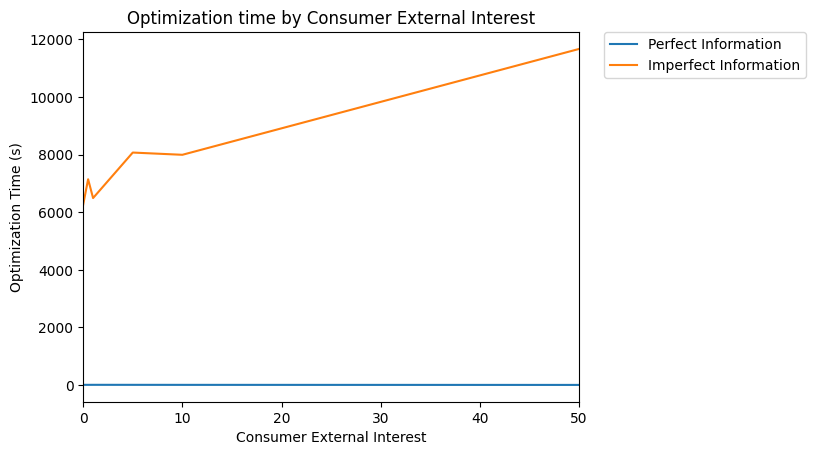

In [13]:
visualize.plot_value_by_test(f"Optimization time by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'optimization_time', varied_param_values, varied_param_x_label, 'Optimization Time (s)')

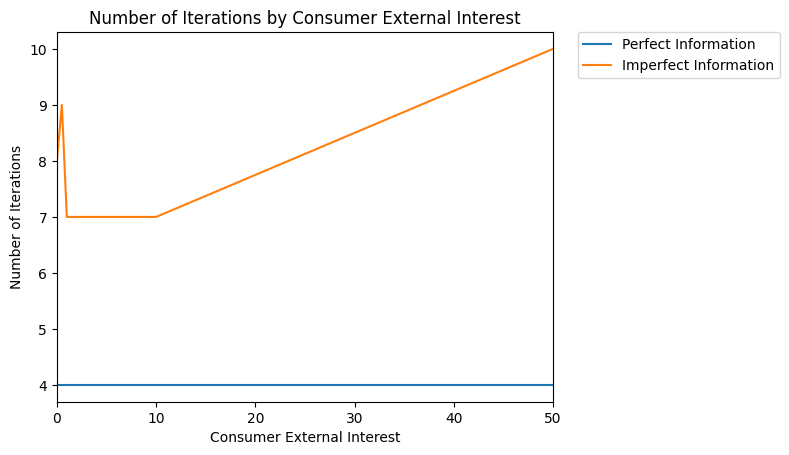

In [14]:
visualize.plot_value_by_test(f"Number of Iterations by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'num_iterations', varied_param_values, varied_param_x_label, 'Number of Iterations')

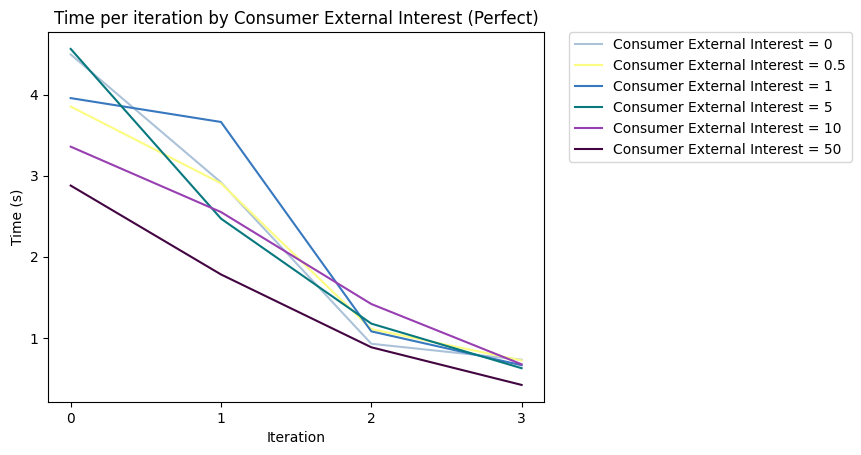

In [15]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Perfect)", perfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

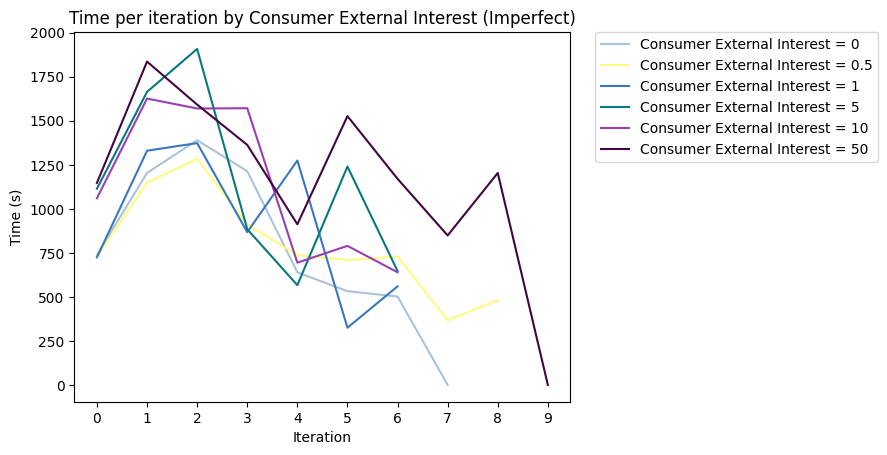

In [16]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Imperfect)", imperfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

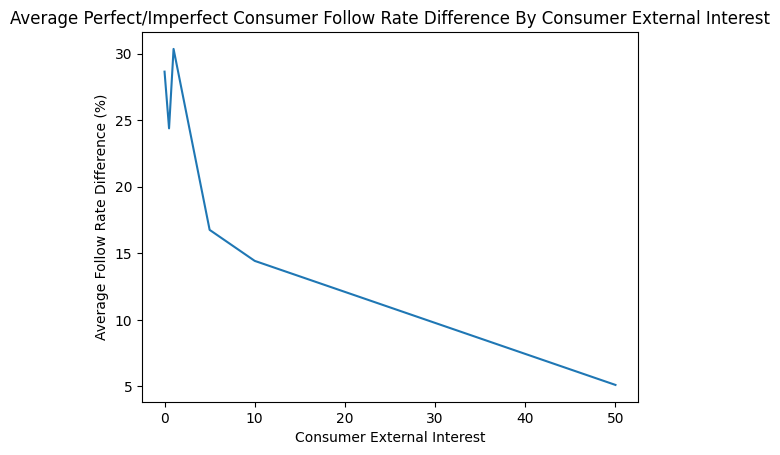

In [17]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.consumer_stats:
        perfect_consumer_stat = perfect_stat.consumer_stats[index]
        imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_consumer_stat.following_rates[-1] - imperfect_consumer_stat.following_rates[-1]) / np.linalg.norm(perfect_consumer_stat.following_rates[-1] + 1e-10) * 100
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.consumer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Perfect/Imperfect Consumer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference (%)")
plt.plot(varied_param_values, avg_follow_rate_diffs)
#plt.ylim(0, 10)
plt.show()

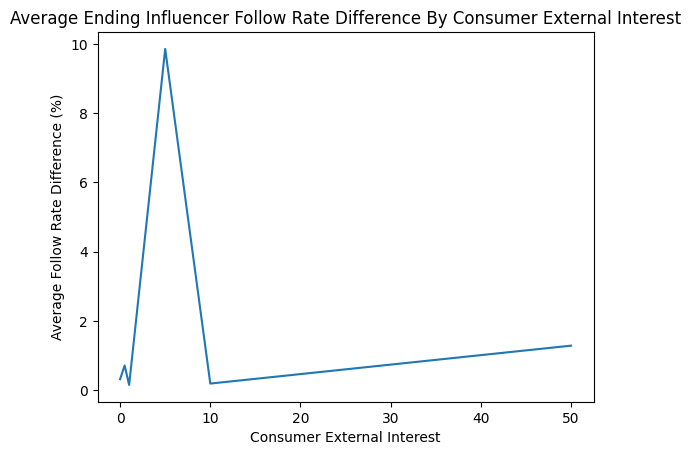

In [18]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.influencer_stats:
        perfect_influencer_stat = perfect_stat.influencer_stats[index]
        imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_influencer_stat.following_rates[-1] - imperfect_influencer_stat.following_rates[-1]) / np.linalg.norm(perfect_influencer_stat.following_rates[-1]) * 100
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.influencer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Influencer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference (%)")
plt.plot(varied_param_values, avg_follow_rate_diffs)
#plt.ylim(0, 10)
plt.show()

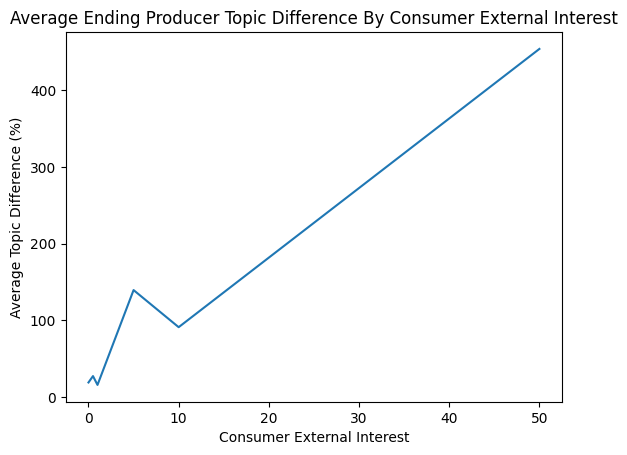

In [19]:
avg_topic_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_topic_diff = 0

    for index in perfect_stat.producer_stats:
        perfect_producer_stat = perfect_stat.producer_stats[index]
        imperfect_producer_stat = imperfect_stat.producer_stats[index]

        ending_topic_diff = np.linalg.norm(perfect_producer_stat.topics[-1] - imperfect_producer_stat.topics[-1]) / (np.linalg.norm(perfect_producer_stat.topics[-1]) + 1e-8) * 100
        avg_topic_diff += ending_topic_diff
    
    avg_topic_diff /= len(perfect_stat.producer_stats)
    avg_topic_diffs.append(avg_topic_diff)

plt.figure()
plt.title(f"Average Ending Producer Topic Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Topic Difference (%)")
plt.plot(varied_param_values, avg_topic_diffs)
#plt.ylim(0, 10)
plt.show()

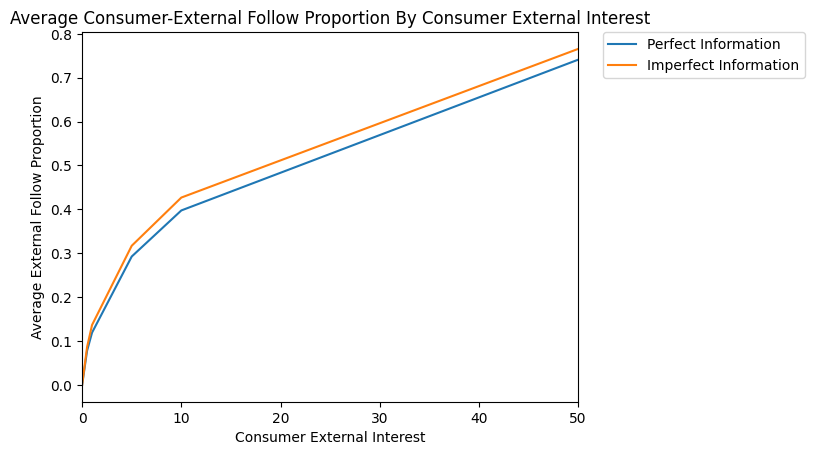

In [20]:
visualize.plot_ending_value_by_test(f"Average Consumer-External Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_external_follow_proportion', varied_param_values, varied_param_x_label, 'Average External Follow Proportion')

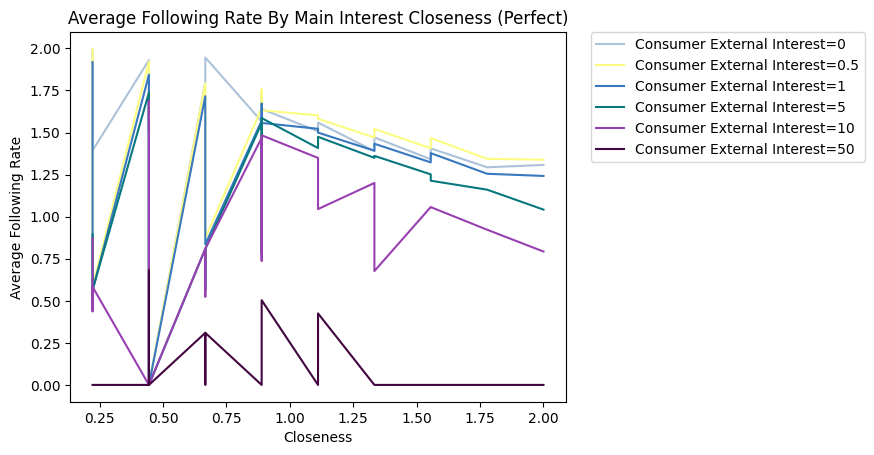

In [21]:
plt.figure()
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_rate_by_main_interest_closeness = perfect_stat.average_following_rate_by_main_interest_closeness
    if len(avg_rate_by_main_interest_closeness) == 0:
        continue
    closenesses = [x[0] for x in avg_rate_by_main_interest_closeness]
    rates = [x[1] for x in avg_rate_by_main_interest_closeness]
    min_rate = min(rates)
    max_rate = max(rates)
    #rates = [(x - min_rate) / (max_rate - min_rate) for x in rates]
    plt.plot(closenesses, rates, label=f"{varied_param_legend_label}={varied_param_values[i]}", color=palette[i])
plt.title(f"Average Following Rate By Main Interest Closeness (Perfect)")
plt.xlabel("Closeness")
plt.ylabel("Average Following Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

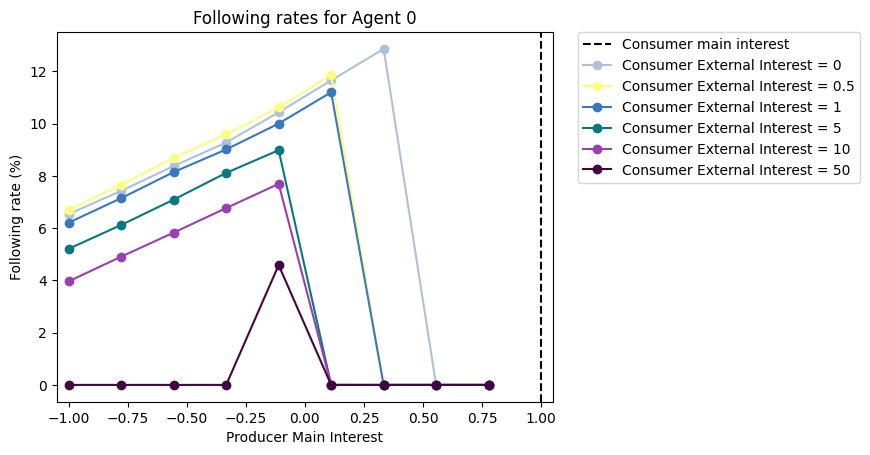

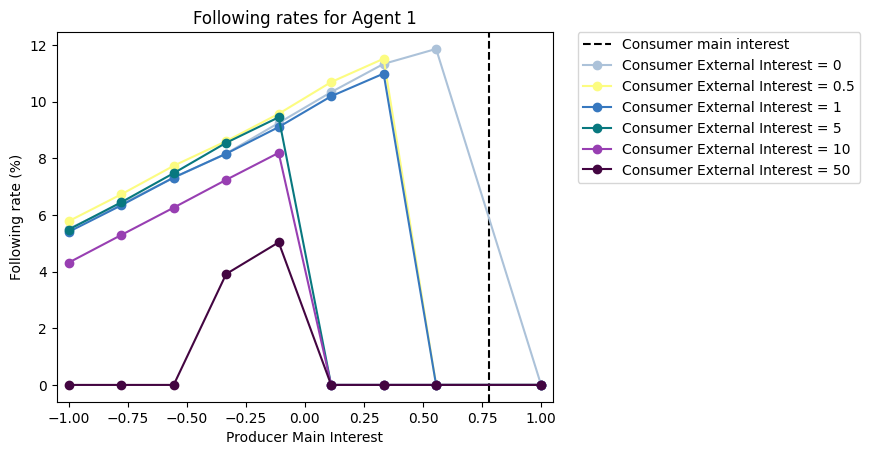

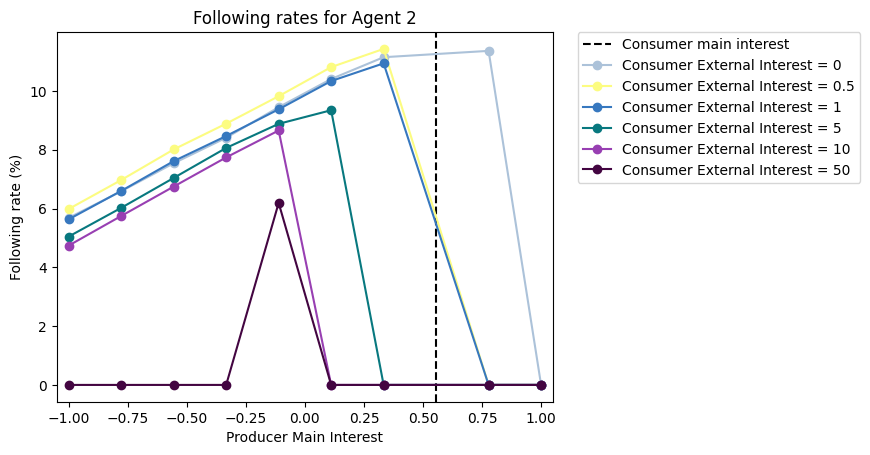

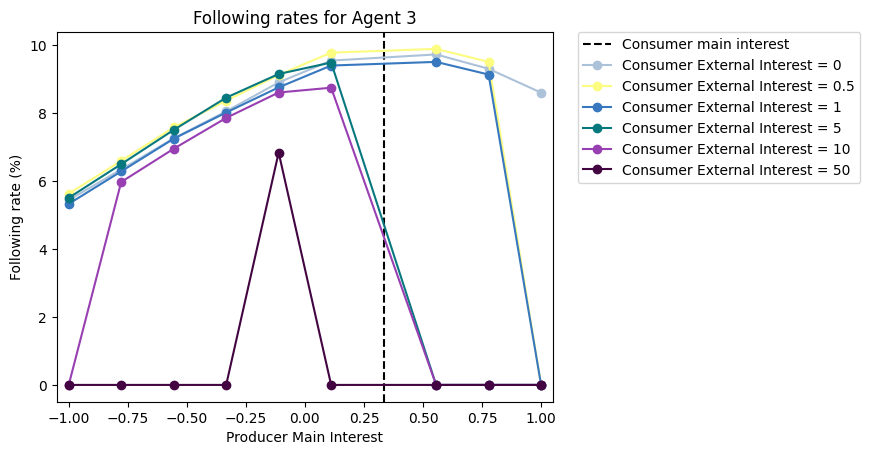

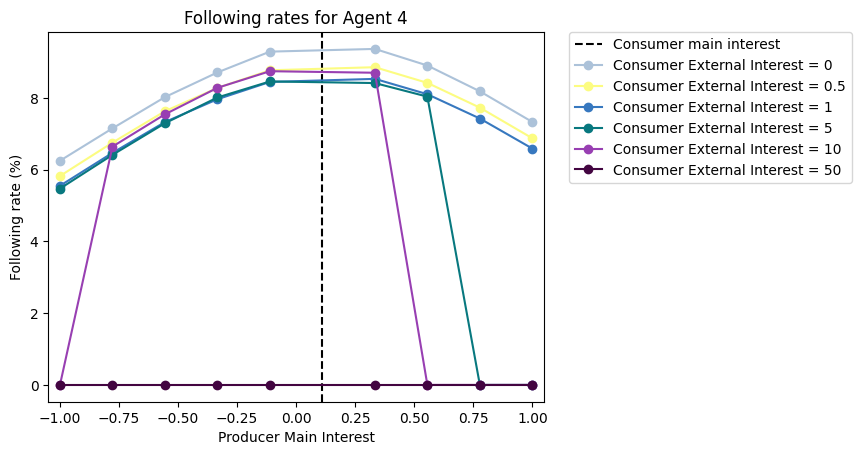

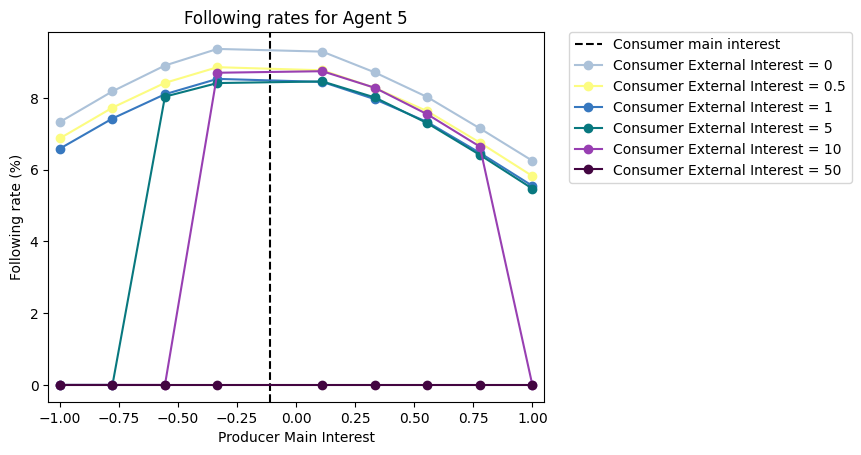

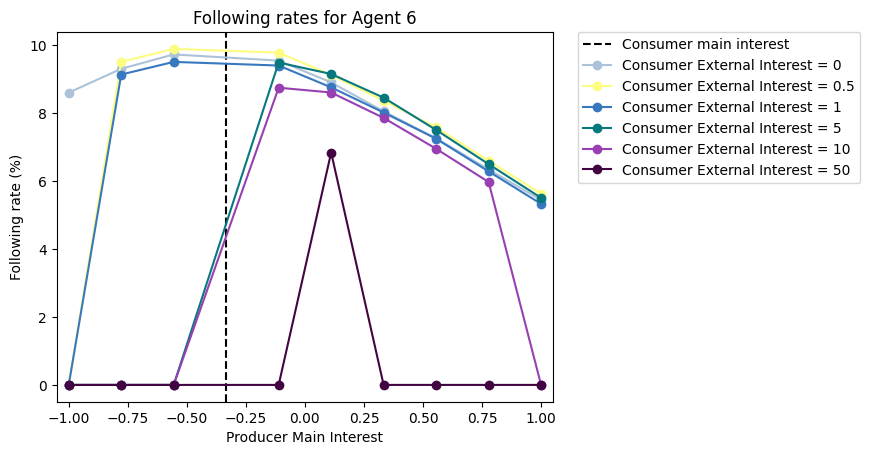

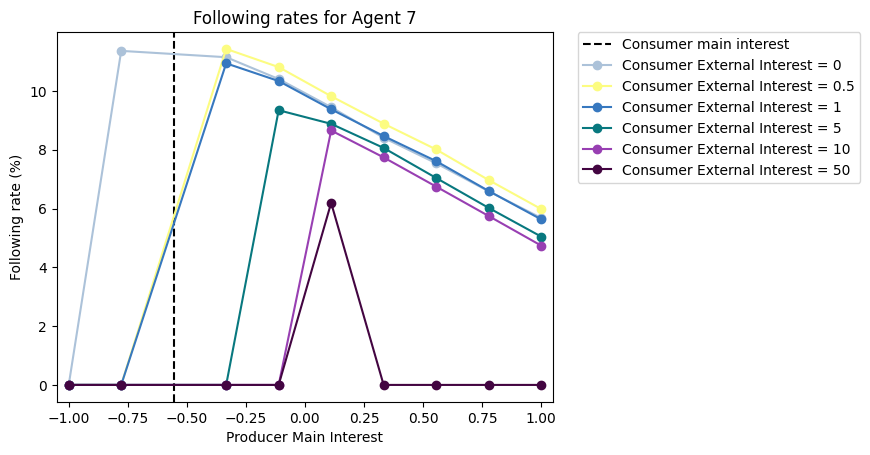

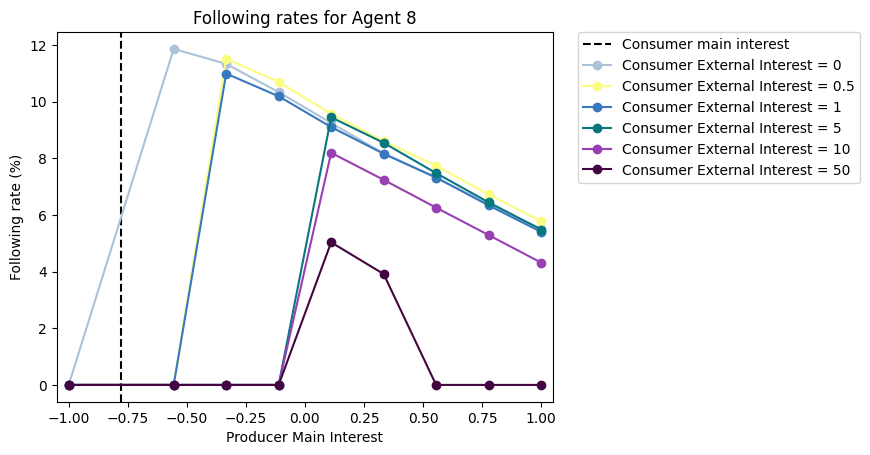

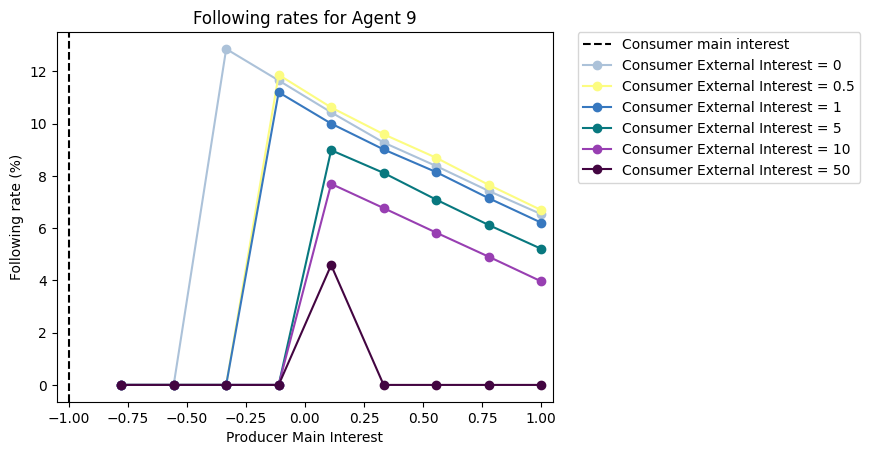

In [22]:
for i in range(num_agents):
    visualize.plot_agent_following_rates_by_test(i, [stat.consumer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

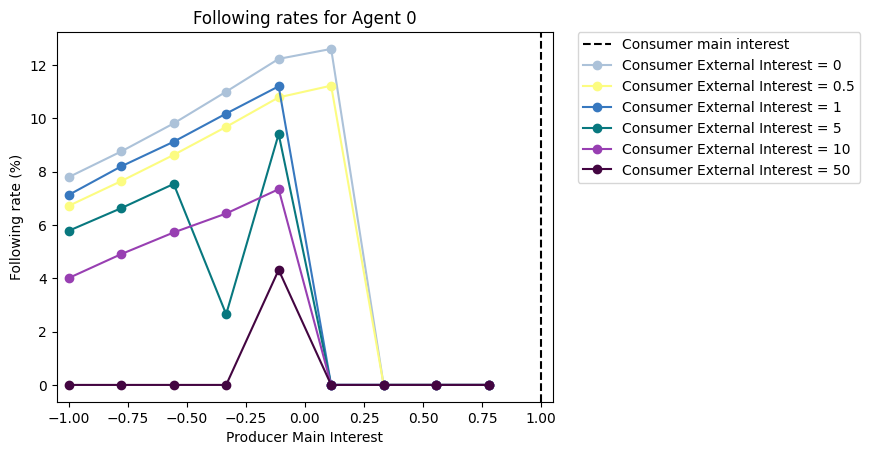

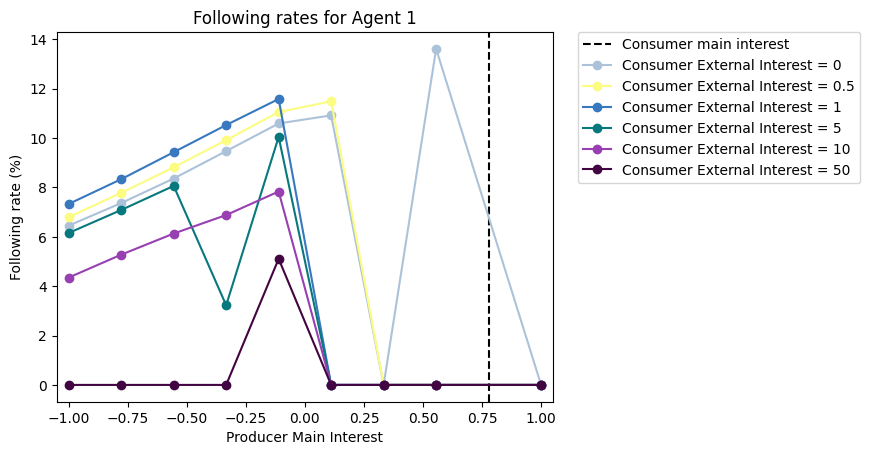

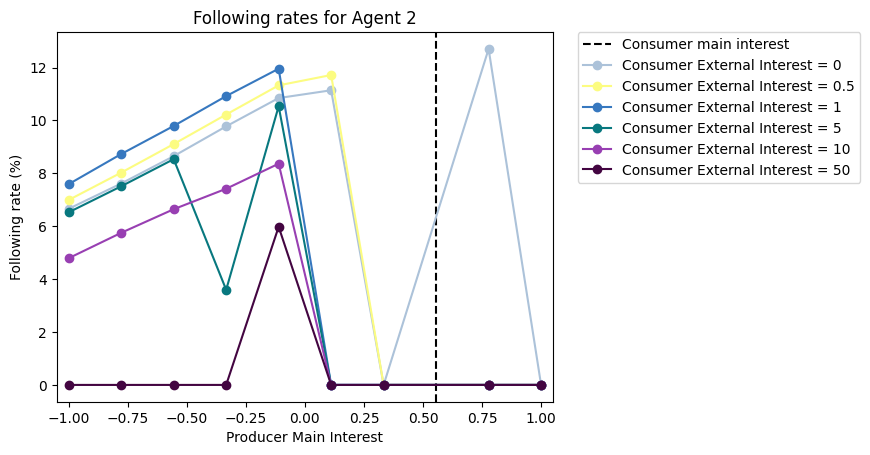

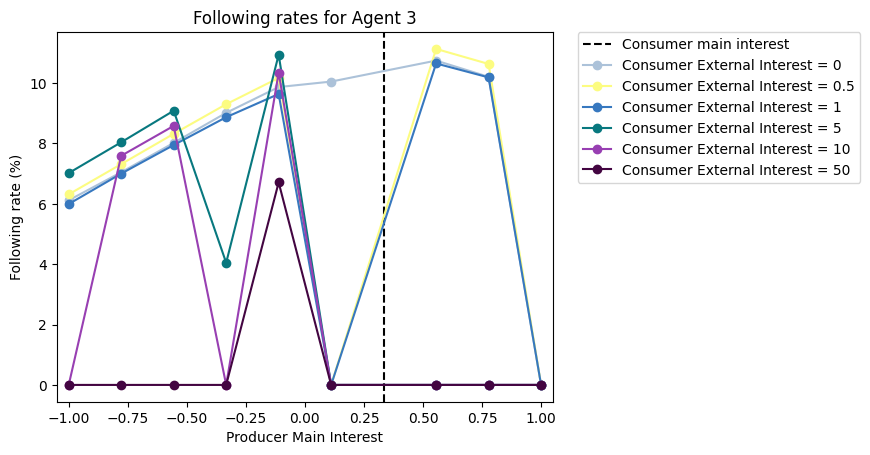

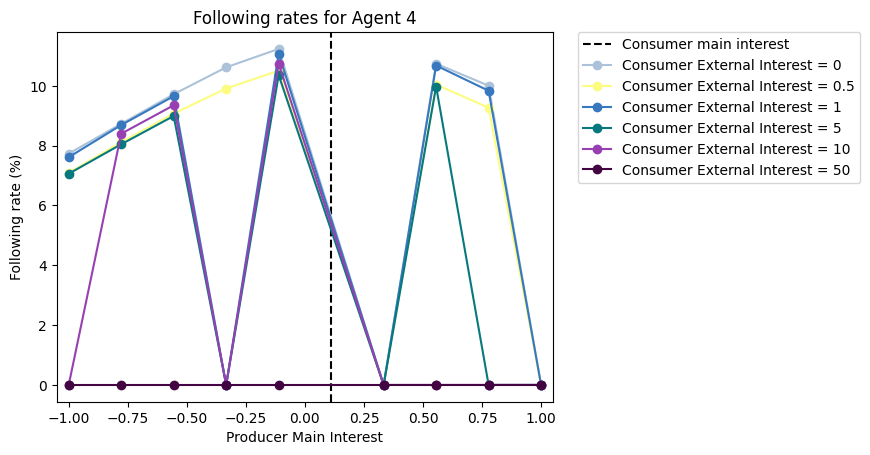

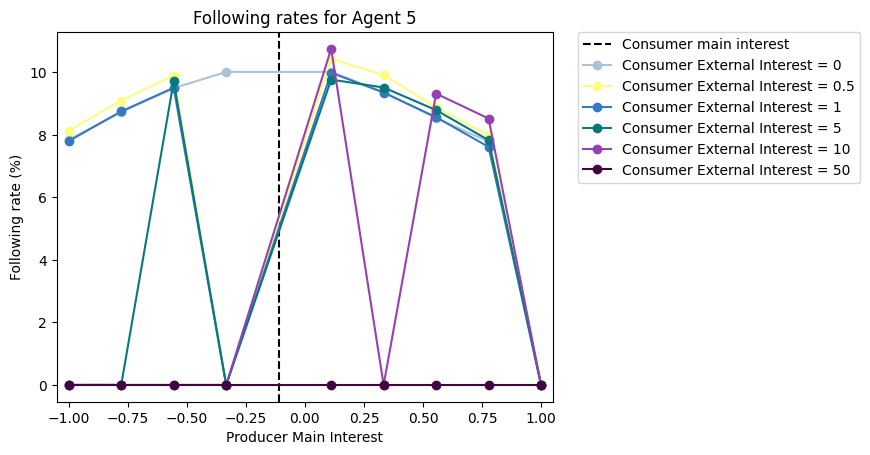

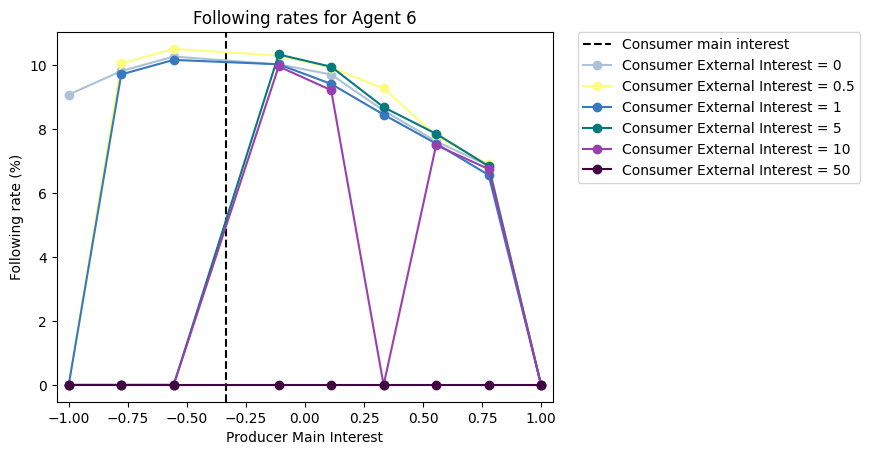

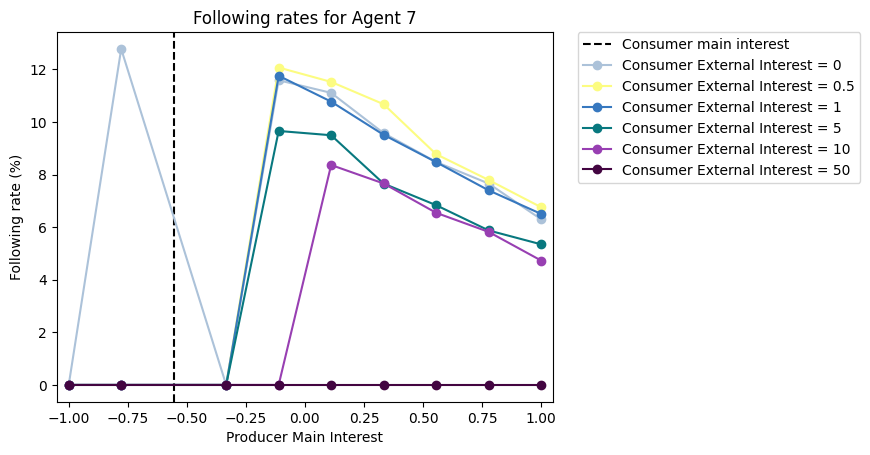

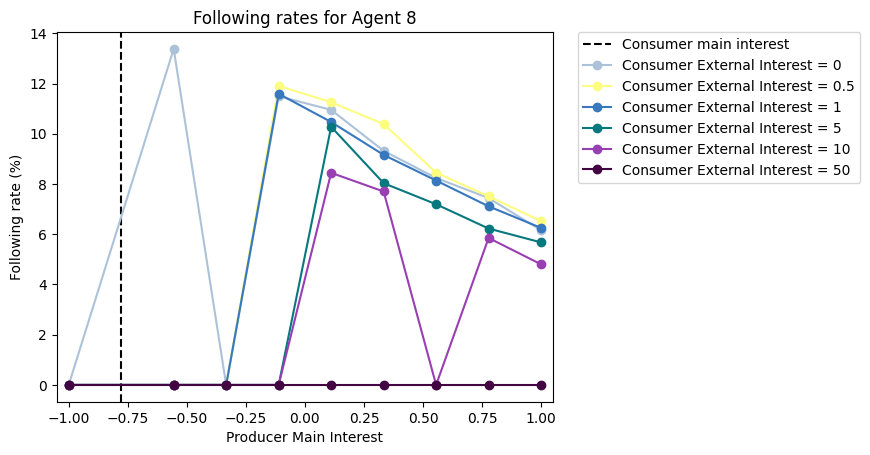

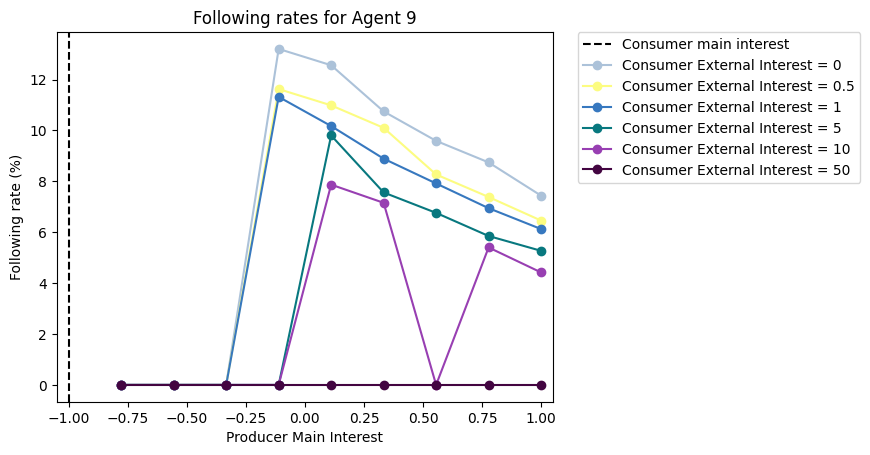

In [23]:
for i in range(num_agents):
    visualize.plot_agent_following_rates_by_test(i, [stat.consumer_stats for stat in imperfect_info_stats], varied_param_legend_label, varied_param_values)

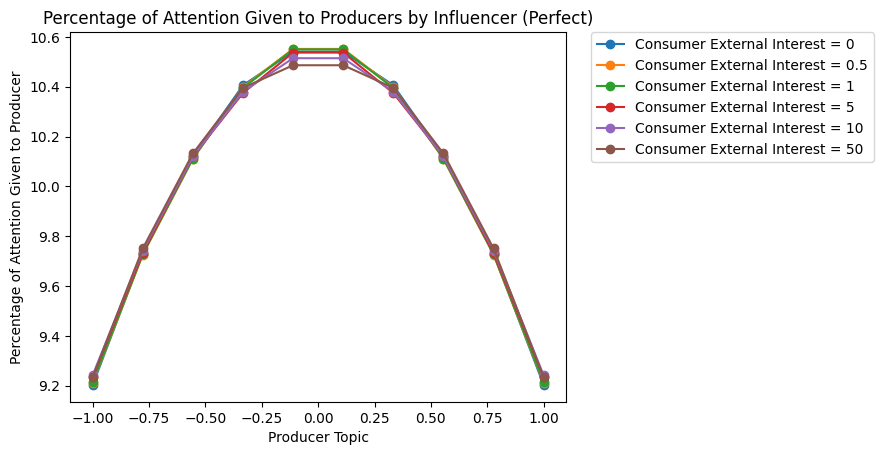

In [24]:
#visualize.plot_agent_following_rates_by_test(num_agents, [stat.influencer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Percentage of Attention Given to Producers by Influencer (Perfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Percentage of Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

[3.6714168  3.88631042 4.05729919 4.16976096 4.1832392  4.22140533
 4.17029038 4.05621112 3.89828496 3.68578164 0.         0.        ]
[3.69617939 3.90273432 4.06065238 4.07922296 4.20215327 4.2267875
 4.17533526 4.06011025 3.90160367 3.69522101 0.         0.        ]
[3.68994192 3.89447162 4.05009225 4.16530873 4.20728316 4.21340678
 4.16231201 4.04685954 3.88830757 3.68201644 0.         0.        ]
[3.63534605 4.0684253  4.23090773 4.33883829 4.18930883 4.39870928
 2.99543735 4.23347099 4.06168159 3.8478746  0.         0.        ]
[3.6912961  3.88162524 4.05626918 4.15021733 4.21064098 4.20875496
 4.15935836 4.05751267 3.89506895 3.68925621 0.         0.        ]
[3.69245892 3.91114133 4.05517471 4.17983937 4.04360693 4.2313069
 4.17286327 4.075476   3.92019545 3.71793712 0.         0.        ]


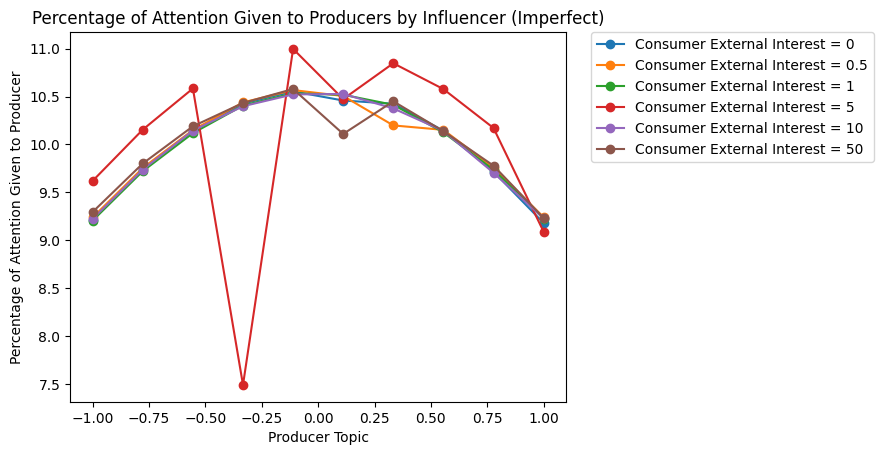

In [25]:
for val, stat in zip(varied_param_values, imperfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    print(following_rates)
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Percentage of Attention Given to Producers by Influencer (Imperfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Percentage of Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [26]:
imperfect_info_stats[-4].influencer_stats[num_agents].following_rates[-1]

array([3.68994192, 3.89447162, 4.05009225, 4.16530873, 4.20728316,
       4.21340678, 4.16231201, 4.04685954, 3.88830757, 3.68201644,
       0.        , 0.        ])

[3.68119875 3.89205969 4.04780008 4.16243729 4.21650484 4.21650982
 4.16244066 4.04779614 3.89205679 3.68119593] 0.19433633780344506
[3.6714168  3.88631042 4.05729919 4.16976096 4.1832392  4.22140533
 4.17029038 4.05621112 3.89828496 3.68578164] 0.19412078339593342
[3.68472697 3.89062126 4.04432055 4.15953819 4.22079345 4.22078943
 4.15953797 4.04432344 3.89062225 3.6847265 ] 0.19366286521949796
[3.69617939 3.90273432 4.06065238 4.07922296 4.20215327 4.2267875
 4.17533526 4.06011025 3.90160367 3.69522101] 0.18464800247660043
[3.68586989 3.89129964 4.0447382  4.15809942 4.21999759 4.21999497
 4.15809893 4.04474036 3.89129054 3.68587046] 0.1928157791832317
[3.68994192 3.89447162 4.05009225 4.16530873 4.20728316 4.21340678
 4.16231201 4.04685954 3.88830757 3.68201644] 0.19176729938026196
[3.69385535 3.89308311 4.04818128 4.15000038 4.2148839  4.21488804
 4.14999006 4.04818007 3.89308005 3.69385777] 0.18769724529161194
[3.63534605 4.0684253  4.23090773 4.33883829 4.18930883 4.39870928
 2.9

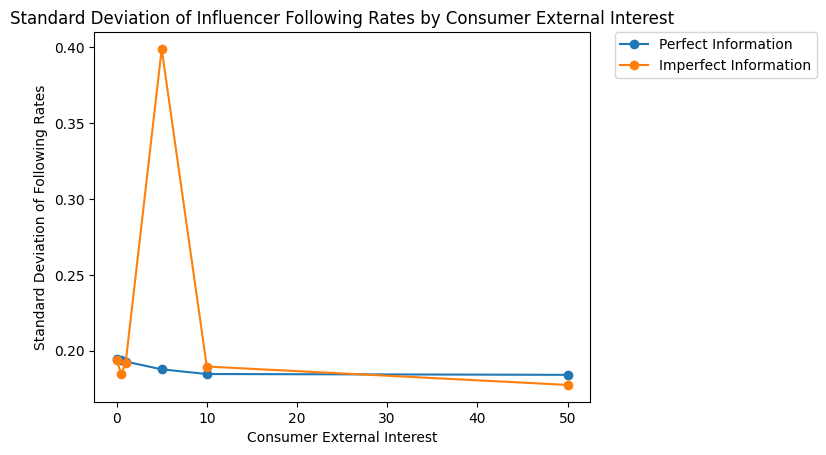

In [27]:
perfect_following_rate_std_devs = []
imperfect_following_rate_std_devs = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perfect_following_rates = perfect_influencer_stat.following_rates[-1][:num_agents]
    perfect_following_rates_std_dev = np.std(perfect_following_rates)
    print(perfect_following_rates, perfect_following_rates_std_dev)

    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperfect_following_rates = imperfect_influencer_stat.following_rates[-1][:num_agents]
    imperfect_following_rates_std_dev = np.std(imperfect_following_rates)
    print(imperfect_following_rates, imperfect_following_rates_std_dev)

    perfect_following_rate_std_devs.append(perfect_following_rates_std_dev)
    imperfect_following_rate_std_devs.append(imperfect_following_rates_std_dev)

plt.figure()
plt.title(f"Standard Deviation of Influencer Following Rates by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Standard Deviation of Following Rates")
plt.plot(varied_param_values, perfect_following_rate_std_devs, label="Perfect Information", marker='o')
plt.plot(varied_param_values, imperfect_following_rate_std_devs, label="Imperfect Information", marker='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

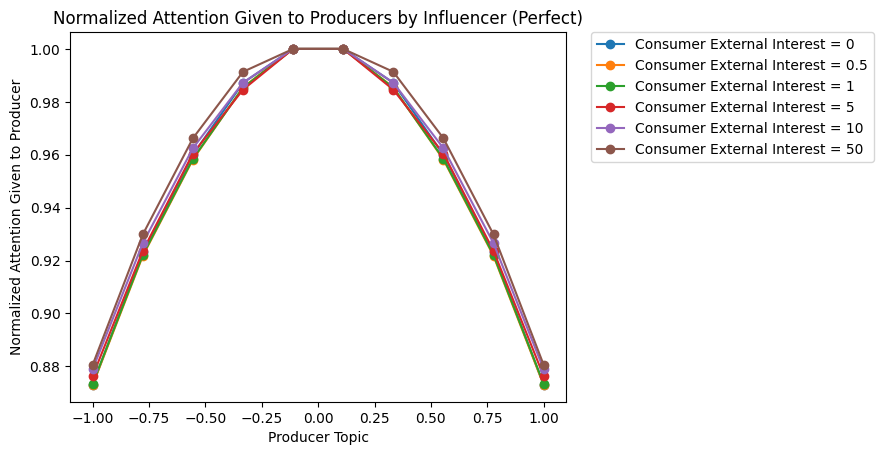

In [28]:
for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Normalized Attention Given to Producers by Influencer (Perfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

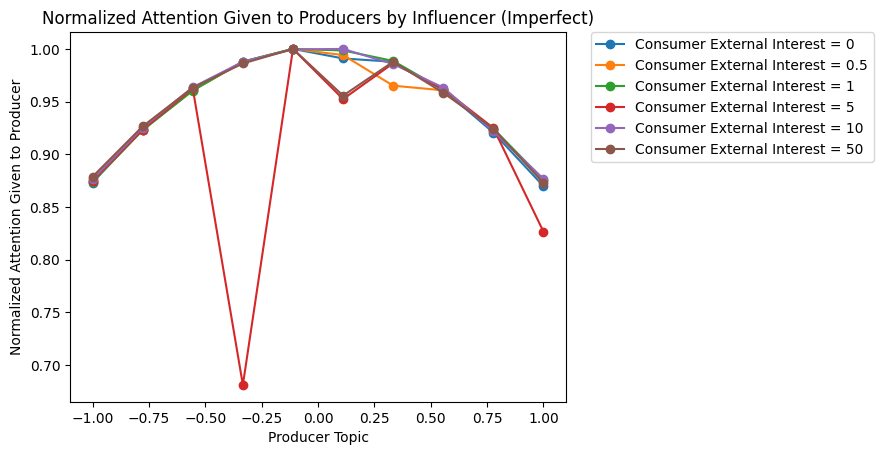

In [29]:
for val, stat in zip(varied_param_values, imperfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Normalized Attention Given to Producers by Influencer (Imperfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

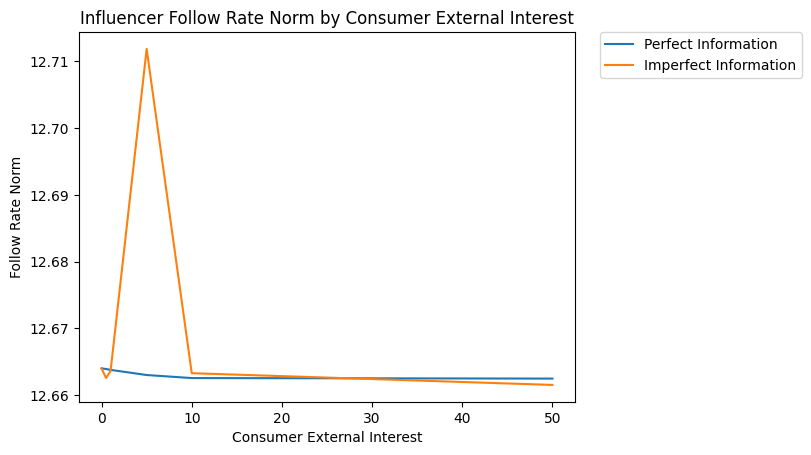

In [30]:
perf_norms = []
imperf_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    following_rates = perfect_influencer_stat.following_rates[-1]
    perf_norm = np.linalg.norm(following_rates)
    perf_norms.append(perf_norm)

    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    following_rates = imperfect_influencer_stat.following_rates[-1]
    imperf_norm = np.linalg.norm(following_rates)
    imperf_norms.append(imperf_norm)

plt.plot(varied_param_values, perf_norms, label='Perfect Information')
plt.plot(varied_param_values, imperf_norms, label='Imperfect Information')
plt.title(f"Influencer Follow Rate Norm by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Follow Rate Norm")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

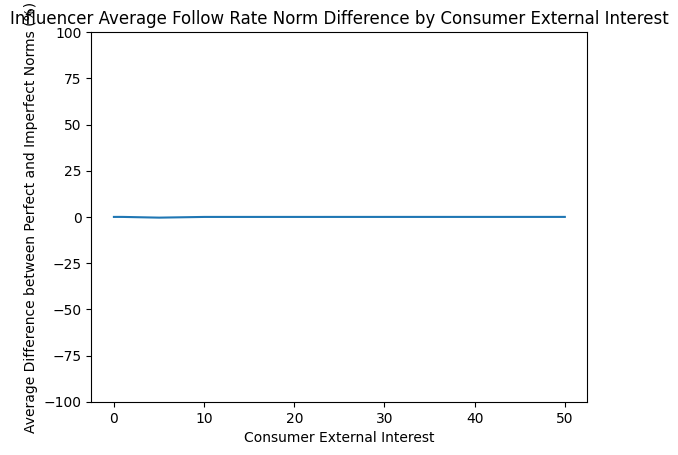

In [31]:
difference_of_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_difference_of_norms = 0
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perf_following_rates = perfect_influencer_stat.following_rates[-1]
    perf_norm = np.linalg.norm(perf_following_rates)
    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperf_following_rates = imperfect_influencer_stat.following_rates[-1]
    imperf_norm = np.linalg.norm(imperf_following_rates)
    avg_difference_of_norms += (perf_norm - imperf_norm) / perf_norm * 100
    avg_difference_of_norms /= len(perf_stat.influencer_stats)
    difference_of_norms.append(avg_difference_of_norms)

plt.plot(varied_param_values, difference_of_norms)
plt.title(f"Influencer Average Follow Rate Norm Difference by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Difference between Perfect and Imperfect Norms (%)")
plt.ylim(-100, 100)
plt.show()

0.9999950260212546
0.9999747244539409
0.9999988828592433
0.9951707009719669
0.9999982241472092
0.9999175948122294


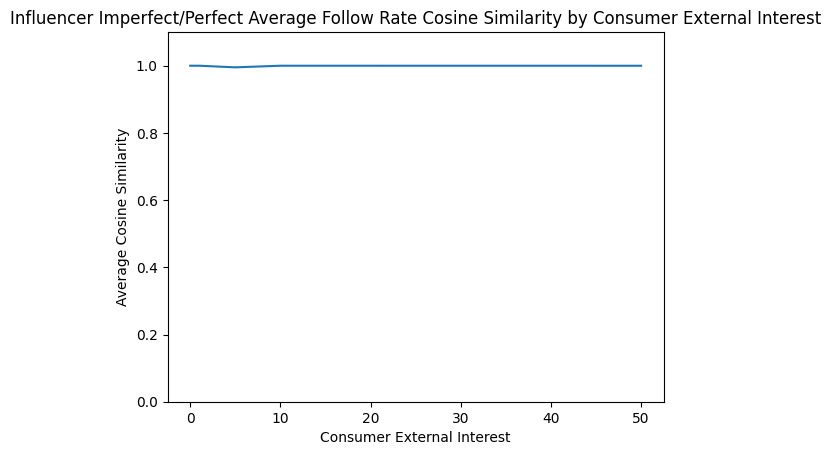

In [32]:
cosine_similarities = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perf_following_rates = perfect_influencer_stat.following_rates[-1]
    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperf_following_rates = imperfect_influencer_stat.following_rates[-1]
    print(np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates)))
    cosine_similarity = np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates))
    cosine_similarities.append(cosine_similarity)

plt.plot(varied_param_values, cosine_similarities)
plt.title(f"Influencer Imperfect/Perfect Average Follow Rate Cosine Similarity by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Cosine Similarity")
plt.ylim(0, 1.1)
plt.show()

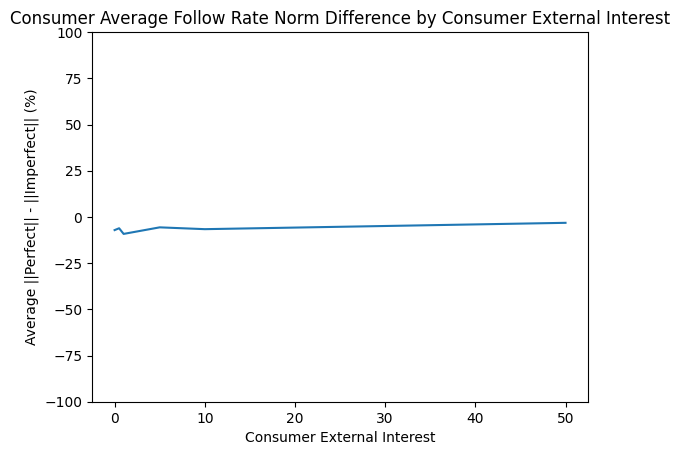

In [33]:
difference_of_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_difference_of_norms = 0
    for consumer_ind in perf_stat.consumer_stats:
        perfect_consumer_stat = perf_stat.consumer_stats[consumer_ind]
        perf_following_rates = perfect_consumer_stat.following_rates[-1]
        perf_norm = np.linalg.norm(perf_following_rates)
        imperfect_consumer_stat = imperf_stat.consumer_stats[consumer_ind]
        imperf_following_rates = imperfect_consumer_stat.following_rates[-1]
        imperf_norm = np.linalg.norm(imperf_following_rates)
        avg_difference_of_norms += (perf_norm - imperf_norm) / perf_norm * 100
    avg_difference_of_norms /= len(perf_stat.consumer_stats)

    difference_of_norms.append(avg_difference_of_norms)

plt.plot(varied_param_values, difference_of_norms)
plt.title(f"Consumer Average Follow Rate Norm Difference by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average ||Perfect|| - ||Imperfect|| (%)")
plt.ylim(-100, 100)
plt.show()

[0.9625684438060487, 0.9678392252021311, 0.9560342131727216, 0.9833392557102693, 0.98738130082049, 0.9985835291391023]


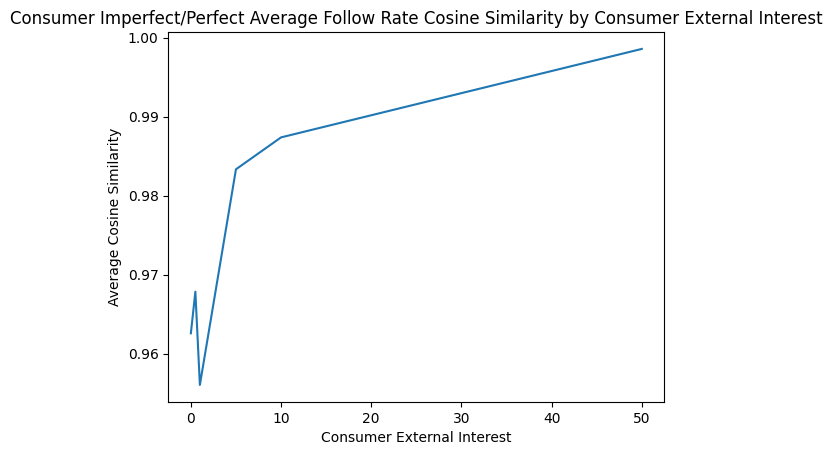

In [34]:
cosine_similarities = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_cosine_similarity = 0
    for consumer_ind in perf_stat.consumer_stats:
        perfect_consumer_stat = perf_stat.consumer_stats[consumer_ind]
        perf_following_rates = perfect_consumer_stat.following_rates[-1]
        imperfect_consumer_stat = imperf_stat.consumer_stats[consumer_ind]
        imperf_following_rates = imperfect_consumer_stat.following_rates[-1]
        avg_cosine_similarity += np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates))
    avg_cosine_similarity /= len(perf_stat.consumer_stats)
    cosine_similarities.append(avg_cosine_similarity)

plt.plot(varied_param_values, cosine_similarities)
print(cosine_similarities)
plt.title(f"Consumer Imperfect/Perfect Average Follow Rate Cosine Similarity by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Cosine Similarity")
plt.show()

In [35]:
for stat in perfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 4, 'total_consumer_utility': [0, 66.14935272600275, 69.0777814758257, 69.17612985372634, 69.1793214674289], 'total_producer_utility': [0, 66.14935272600275, 69.0777814758257, 69.17612985372635, 69.1793214674289], 'total_influencer_utility': [0, 38.90885929399023, 39.05061083673358, 39.11427234729227, 39.11912105622499], 'total_social_welfare': [0, 66.14935272600275, 69.0777814758257, 69.17612985372634, 69.1793214674289], 'average_consumer_rate_change': [0, 4.90146862617005, 2.2679702330356237, 0.08998877360199078, 0.08675487879050972], 'average_producer_topic_change': [0, 1.3908782963392314, 0.04406745535476348, 0.03094401100125449, 0.0009565329040229775], 'average_influencer_rate_change': [0, 1.9496177209250676, 1.3851369017876456, 0.01205918000590071, 0.0], 'average_consumer_utility_change': [0, 6.614935272600276, 0.2928428749822948, 0.009834837790063578, 0.0003191613702579588], 'average_producer_utility_change': [0, 6.614935272600275, 0.29284287498229505, 0.009834

In [36]:
for stat in imperfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 8, 'total_consumer_utility': [0, 44.06831198220558, 55.04731587439073, 63.43822137823765, 65.90086331921853, 66.01350582171965, 66.41876993775816, 66.47007624066465, 66.47046828562647], 'total_producer_utility': [0, 7.620579270013365, 7.68258557032286, 7.779928669156364, 7.781473188092832, 7.781363605142923, 7.783884641165494, 7.783884641165494, 7.783884641165494], 'total_influencer_utility': [0, 25.89262338107364, 32.34993309294928, 37.89982254137575, 39.21655225352159, 39.267206249242314, 39.622829040493045, 39.666205691944256, 39.6655449298905], 'total_social_welfare': [0, 44.06831198220558, 55.04731587439073, 63.43822137823765, 65.90086331921853, 66.01350582171965, 66.41876993775816, 66.47007624066465, 66.47046828562647], 'average_consumer_rate_change': [0, 4.90146862617005, 2.945213149429706, 1.4928594768206034, 0.9168230255752668, 0.2760182151915898, 0.035107490609924276, 0.0626339062855745, 0.03349845969462734], 'average_producer_topic_change': [0, 0.962448481